# Exercises for Chapter 3: Shallow Neural Networks

#### *https://github.com/udlbook/udlbook/tree/main/Notebooks/Chap03*

## 3.1 Linear Activation Function (Pen & Paper)

Shallow neural networks are functions $\mathbf{y} = \mathbf{f}[\mathbf{x}, \boldsymbol{\phi}]$ with parameters $\boldsymbol{\phi}$ that map input(s) $\mathbf{x}$ to output(s) $\mathbf{y}$. Assume an example network $\mathbf{f}[x, \boldsymbol{\phi}]$ that maps a scalar input $x$ to a scalar output $y$ with three hidden units.

a) Write the neural network as a function of its input and the parameters of the model: $\mathbf{f}[x, \boldsymbol{\phi}] = ...$. Use the generic activation function $a[\cdot]$.

b) Instead of using a non-linear activation function, let's consider a linear function. What kind of mapping from input to output is created if the activation function is linear so that $a[z] = \psi_0 + \psi_1 z$? What kind of mapping is created if the activation function is removed, i.e. set to the identity function $a[z] = z$?

c) Consider the following networks:

  1.  one input, ten hidden neurons and one output
  2.  three inputs, five hidden neurons and two outputs

  Which model has more parameters? First sketch both models, then count the number of parameters.


#### SOLUTION

a) $\boldsymbol{\phi} = \{\phi_0, \phi_1, \phi_2, \phi_3, \theta_{10}, \theta_{11}, \theta_{20}, \theta_{21}, \theta_{30}, \theta_{31}\}$: 

$$
\begin{aligned}
y &= \mathbf{f}[x, \boldsymbol{\phi}] \\
  &= \phi_0 + \phi_1 a[\theta_{10} + \theta_{11}x] + \phi_2 a[\theta_{20} + \theta_{21}x] + \phi_3 a[\theta_{30} + \theta_{31}x].
\end{aligned}
$$

b) If this mapping is linear, then the overall function is a composition of three linear functions. A
linear function applied to another linear function just creates a new linear function with a new
slope and offset, so the model will only be able to describe lines. This is still true when the
activation function is removed as this is just a special case where $\psi_0 = 0$ and $\psi_1 = 1$.

c) $1 \cdot 10 + 10 + 10 \cdot 1 + 1 = 31$ vs $3 \cdot 5 + 5 + 5 \cdot 2 + 2 = 32$.  

## 3.2 ReLU Activation in a Shallow Neural Network

Let's examine the functional form of a shallow neural network with one input and one output more thoroughly.

In [1]:
# imports
import numpy as np # computations
import matplotlib.pyplot as plt # plotting

In [ ]:
### TASK
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # An elegant way to do this is to use the "clip" function/method
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
  pass

In [3]:
### SOLUTION
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
    activation = preactivation.clip(min=0)
    return activation

In [4]:
### TASK
# Set up an array of x-values between -5 and 5 and calculate the activation using the ReLU function from above

In [5]:
### SOLUTION
# Set up an array of x-values between -5 and 5 and calculate the activation using the ReLU function from above
z = np.linspace(-5, 5, 100) # or np.arange(-5,5,0.1)
RelU_z = ReLU(z)

Text(0, 0.5, 'ReLU[z]')

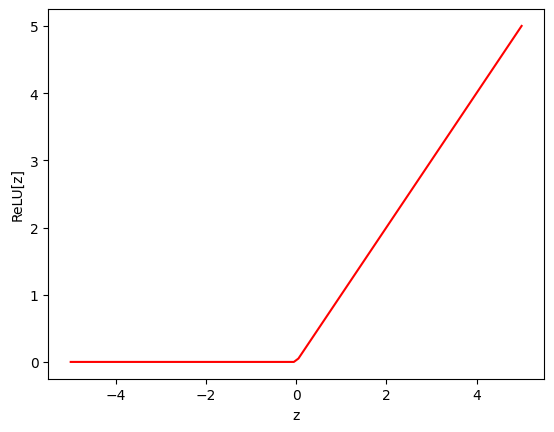

In [6]:
# Plot the ReLU function
plt.plot(z, RelU_z, color='red')
plt.xlabel('z')
plt.ylabel('ReLU[z]')

In [7]:
### TASK
# Define a shallow neural network with one input, one output, and three hidden units
# Use theta_j0 (bias) and theta_j1 (input weight) for each hidden unit $j = 1,2,3$
# Then weight their activations with phi_1, phi_2, and phi_3 before adding phi_0 as output bias.
def shallow_1_1_3(x, activation_fn, 
                  phi_0, phi_1, phi_2, phi_3, 
                  theta_10, theta_11, 
                  theta_20, theta_21, 
                  theta_30, theta_31):
  # TODO Compute pre-activations for hidden units
  pre_1 = np.zeros_like(x)
  pre_2 = np.zeros_like(x)
  pre_3 = np.zeros_like(x)

  # Apply activation function
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Weight the activated outputs
  w_act_1 = np.zeros_like(x)
  w_act_2 = np.zeros_like(x)
  w_act_3 = np.zeros_like(x)

  # TODO Compute final output by summing weighted activations and adding bias
  y = np.zeros_like(x)

  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [8]:
### SOLUTION
# Define a shallow neural network with one input, one output, and three hidden units
# Use theta_j0 (bias) and theta_j1 (input weight) for each hidden unit $j = 1,2,3$
# Then weight their activations with phi_1, phi_2, and phi_3 before adding phi_0 as output bias.
def shallow_1_1_3(x, activation_fn, 
                  phi_0, phi_1, phi_2, phi_3, 
                  theta_10, theta_11, 
                  theta_20, theta_21, 
                  theta_30, theta_31):
    # Compute pre-activations for hidden units
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x

    # Apply activation function
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # Weight the activated outputs
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    # Compute final output by summing weighted activations and adding bias
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


In [9]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
        ax[2,plot_y].set_xlabel('Input')
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel('Input'); ax.set_ylabel('Output')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    if x_data is not None:
      ax.plot(x_data, y_data, 'mo')
      for i in range(len(x_data)):
        ax.plot(x_data[i], y_data[i],)
    plt.show()

In [10]:
### TASK
# TODO Define some network parameters of your choice
theta_10 =  0.0 ; theta_11 = 0.0
theta_20 = 0.0  ; theta_21 = 0.0
theta_30 = 0.0  ; theta_31 = 0.0

phi_0 = 0.0; phi_1 = 0.0; phi_2 = 0.0; phi_3 = 0.0

# TODO: Before running the code below, use pen and paper 
# to guess what the network will look like based on your parametrization!

In [11]:
### SOLUTION
# Define some network parameters of your choice
# One example could look like this
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

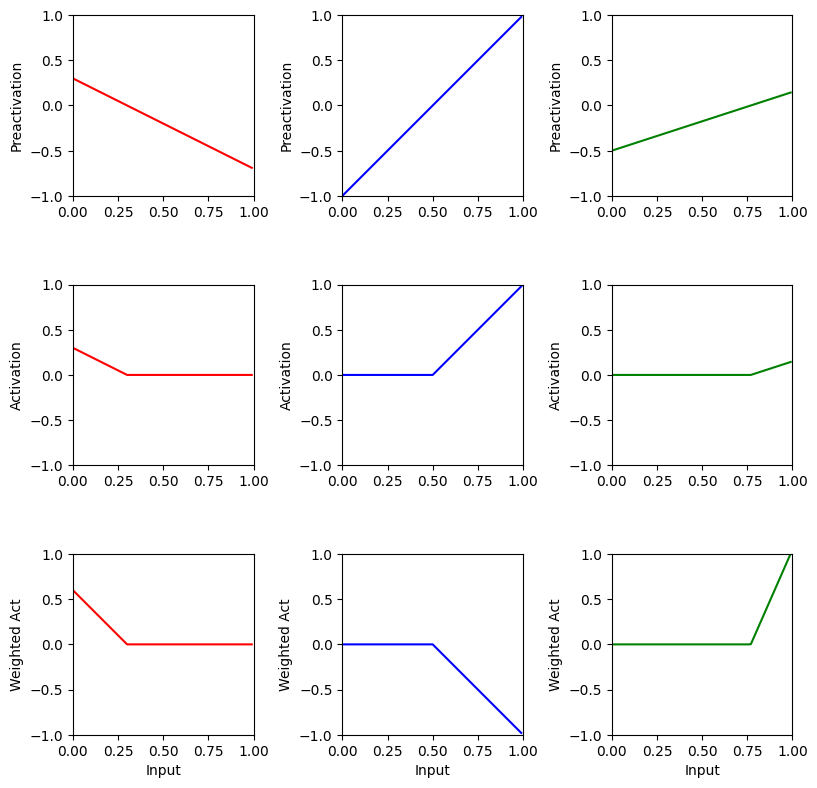

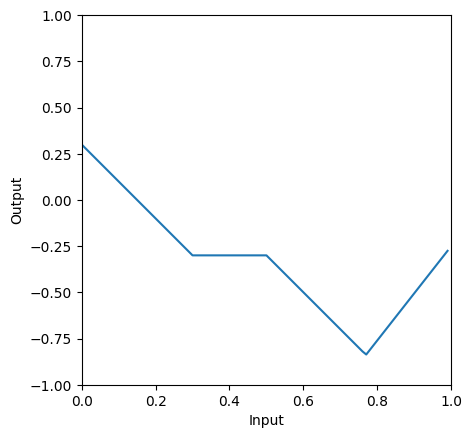

In [12]:
# Define a range of input values
x = np.arange(0, 1, 0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [13]:
### TASK
# 1. Predict what effect changing phi_0 will have on the network.
# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.
# 3. Predict what effect multiplying phi_1 by -1 will have.
# 4. Change the parameters so that there are only two "joints" (including outside the range of the plot)
# (There are actually three ways to do this. See if you can figure them all out)

# TODO: After making your predictions, try out!

In [14]:
### SOLUTION
# 1. Predict what effect changing phi_0 will have on the network.
# Increasing phi_0 shifts the entire output vertically upward

# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.
# Scales the influence of the hidden layer down, i.e., flattens the curve toward a horizontal line.

# 3. Predict what effect multiplying phi_1 by -1 will have.
# This inverts the effect of neuron 1. Any activation from that neuron now pulls the output down instead of up.

# 4. Change the parameters so that there are only two "joints" (including outside the range of the plot)
# (There are actually three ways to do this. See if you can figure them all out)
# a) Deactivating a neuron entirely
# b) Making two neurons activate at the same x
# c) Using a very large or small theta_j0 so the neuron never activates in the plotted range.

Let's now quantify the goodness of fit, the neural network provides. In regression problems, this is mostly done using some sort of squared error.

In [15]:
### TASK
# Least squares function
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to compute the sum of squared
  # differences between the real values of y and the predicted values from the model f[x_i,phi]
  # You will need to use the function np.sum
  loss = 0
  return loss

In [16]:
# SOLUTION
# Least squares loss function
def least_squares_loss(y_train, y_predict):
    loss = np.sum((y_train - y_predict)**2) # or np.mean()
    return loss

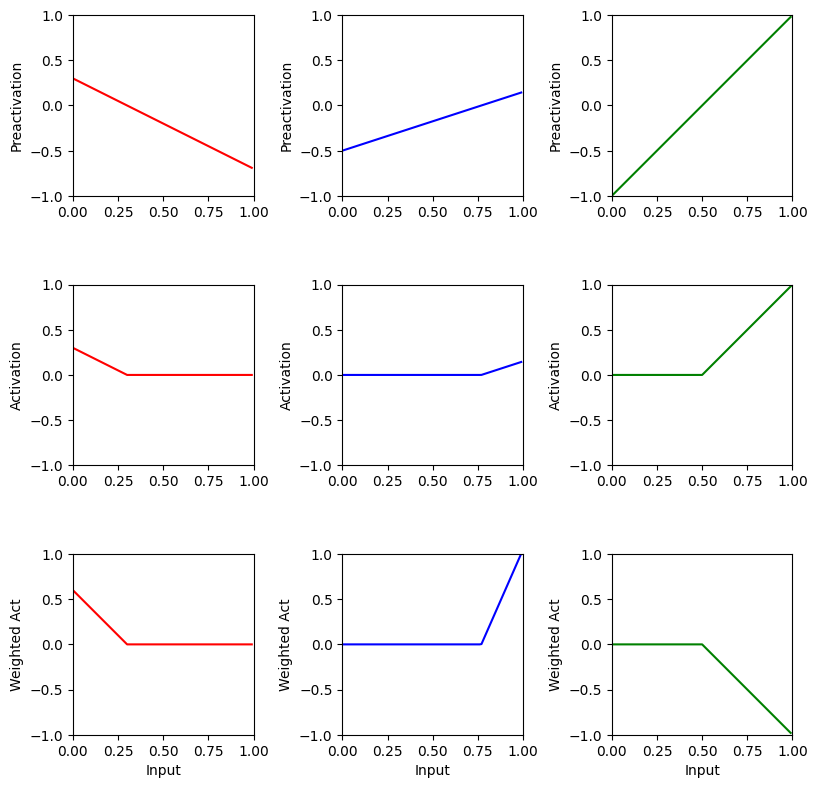

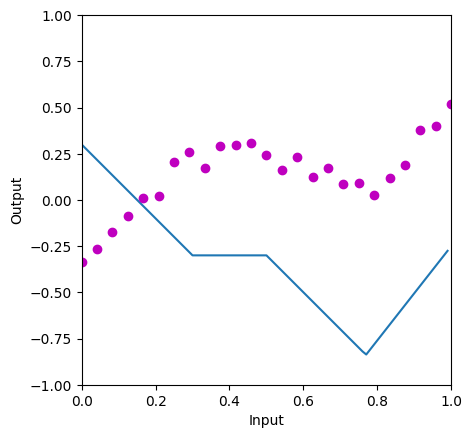

Your loss: 9.8854


In [17]:
### TASK
# TODO: Manipulate the parameters (by hand!) to make the function
# fit the data better and try to reduce the loss to as small a number as possible.
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -0.5  ; theta_21 = 0.65
theta_30 = -1.0  ; theta_31 = 2.0
phi_0 = -0.3; phi_1 = 2.0; phi_2 = 7.0; phi_3 = -1.0

# Before starting, you may find 3.3a here helpful: https://udlbook.github.io/udlfigures/

### TODO Solution approach (do this using pen and paper): 
# 1. Start from the final fit that you would like to obtain by identifying the key points that the final function should pass through.
# 2. Define the weighted activations which are necessary to obtain this fit
# 3. Recover the intercept (phi_0) and the activation, these will also determine the weights phi_j (choose either -1 or 1)
# 4. Determine the preactivations which give rise to these activations (only need their intercepts and slopes)
# 5. Slightly adjust the number to make them fit the data as good as possible

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.linspace(0, 1, 25)
y_train = np.array([-0.3342405, -0.26715097, -0.17616471, -0.08641096,  0.00836382,
                    0.02368695,  0.20337466,  0.25800534,  0.17318782,  0.29441261,
                    0.29479446,  0.30893898,  0.24100376,  0.16174015,  0.23327814,
                    0.12567449,  0.17223336,  0.08680264,  0.09049862,  0.02476276,
                    0.11866199,  0.18802500,  0.38096019,  0.40217894,  0.52009947])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print(f"Your loss: {loss:.4f}")

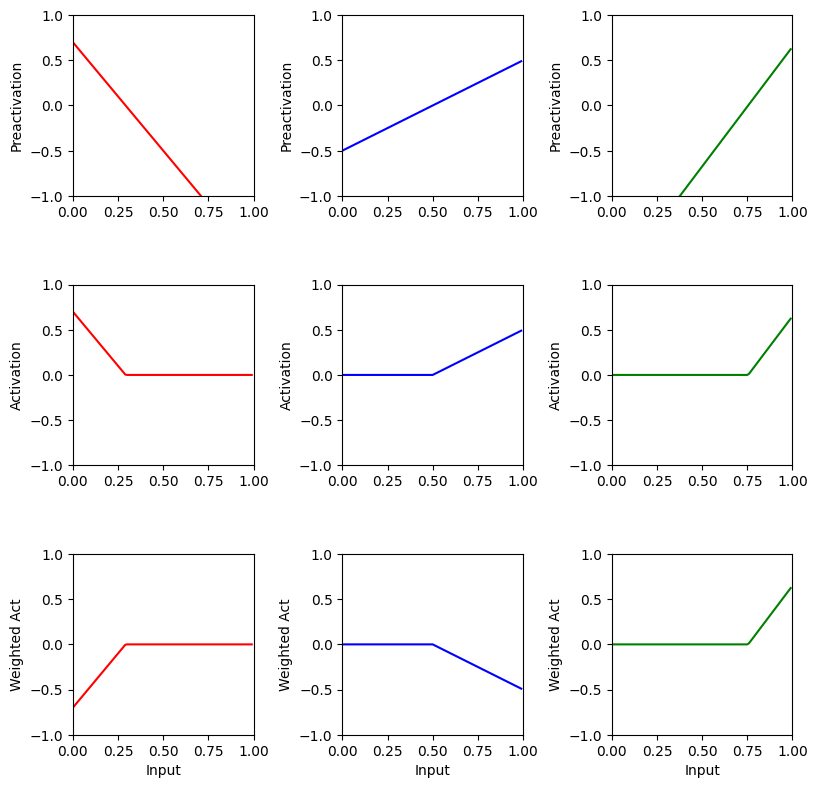

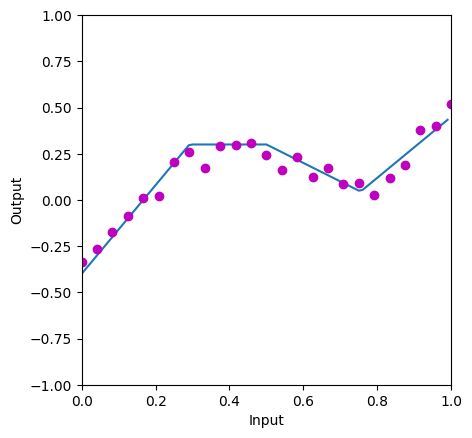

Your loss: 0.0717


In [18]:
### SOLUTION
# TODO: Manipulate the parameters (by hand!) to make the function
# fit the data better and try to reduce the loss to as small a number as possible.
theta_10 =  0.7 ; theta_11 = -2.4
theta_20 = -0.5  ; theta_21 = 1
theta_30 = -2  ; theta_31 = 2.65
phi_0 = 0.3; phi_1 = -1.0; phi_2 = -1.0; phi_3 = 1.0

### TODO Solution approach (do this using pen and paper): 
# 1. Start from the final fit that you would like to obtain by identifying the key points that the final function should pass through.
# 2. Define the weighted activations which are necessary to obtain this fit
# 3. Recover the intercept (phi_0) and the activation, these will also determine the weights phi_j (choose either -1 or 1)
# 4. Determine the preactivations which give rise to these activations (only need their intercepts and slopes)
# 5. Slightly adjust the number to make them fit the data as good as possible

# Before starting, you may find 3.3a here helpful: https://udlbook.github.io/udlfigures/

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.linspace(0, 1, 25)
y_train = np.array([-0.3342405, -0.26715097, -0.17616471, -0.08641096,  0.00836382,
                    0.02368695,  0.20337466,  0.25800534,  0.17318782,  0.29441261,
                    0.29479446,  0.30893898,  0.24100376,  0.16174015,  0.23327814,
                    0.12567449,  0.17223336,  0.08680264,  0.09049862,  0.02476276,
                    0.11866199,  0.18802500,  0.38096019,  0.40217894,  0.52009947])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print(f"Your loss: {loss:.4f}")

## 3.3 Other Activation Functions

### a) Sigmoid
The ReLU isn't the only kind of activation function. For a long time, people used sigmoid functions. It is defined as: $$f[z] = \frac{1}{1 + exp[-z]}$$

In [265]:
### TASK
# Define the sigmoid function
# Importantly, use -10*z inside the exponential which will allow us to plot on the same axes as the ReLU examples)
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the
  # hidden unit from the preactivation.  Use the np.exp() function.
  activation = np.zeros_like(preactivation)
  return activation

In [266]:
### SOLUTION
# Define the sigmoid function
# Importantly, use -10*z inside the exponential which will allow us to plot on the same axes as the ReLU examples)
def sigmoid(preactivation):
  activation = 1 / (1 + np.exp(-10*preactivation))
  return activation

In [267]:
### TASK
# Plot the Sigmoid function (similar to what we have done with the ReLU)
z = np.linspace(-0.3, 0.3, 100)
# TODO

Text(0, 0.5, 'Sigmoid[z]')

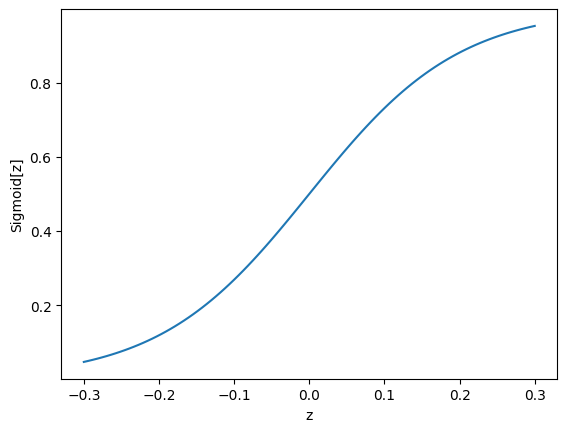

In [268]:
### SOLUTION
# Plot the Sigmoid function (similar to what we have done with the ReLU)
z = np.linspace(-0.3, 0.3, 100)
sig_z = sigmoid(z)
plt.plot(z, sig_z)
plt.xlabel('z')
plt.ylabel('Sigmoid[z]')

Let's see what happens when we use this activation function in a neural network!

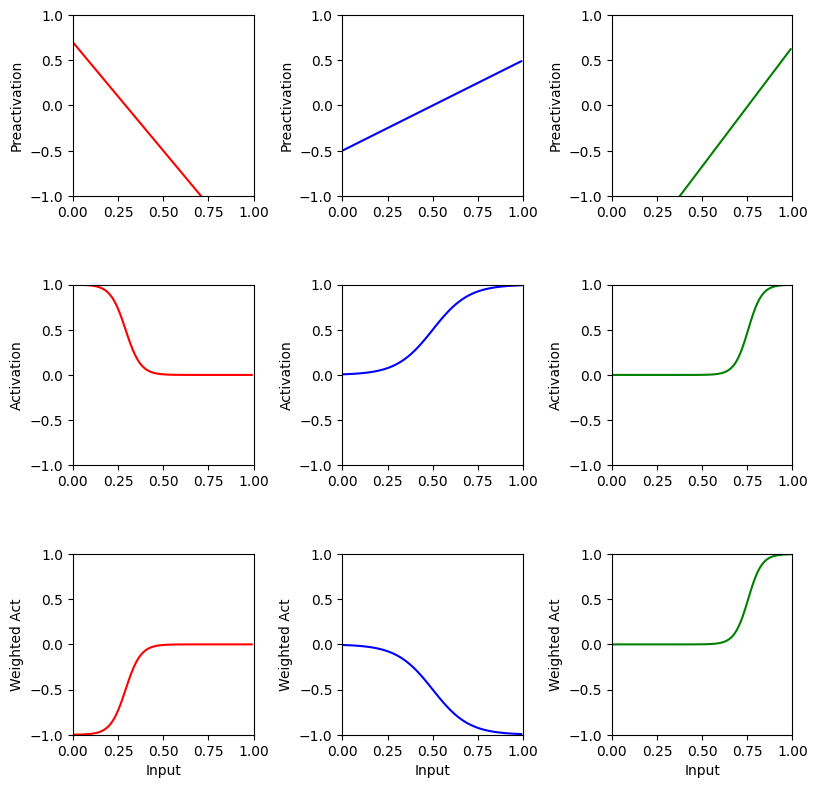

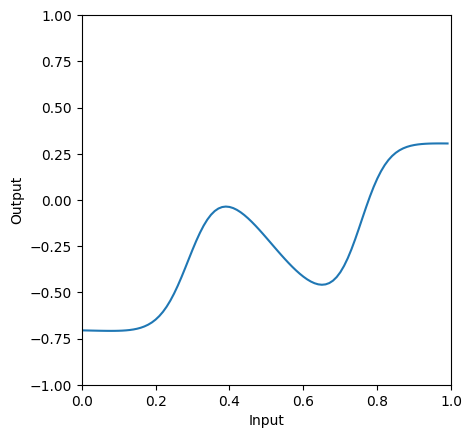

In [ ]:
# Let's use the network parameters from before
# Importantly, we have to use the Sigmoid activation within the shallow_1_1_3() function now
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

### b) Heaviside

The Heaviside function is defined as:
$$ \text{Heaviside}[z] = \begin{cases} 0 & \text{if } z < 0 \\ 1 & \text{if } z \geq 0 \end{cases} $$

In [ ]:
### TASK
# Define the heaviside function
def heaviside(preactivation):
  # TODO write code to implement the heaviside function and compute the activation at the
  # hidden unit from the preactivation. Depending on your implementation you may need to
  # convert a Boolean array to an array of ones and zeros. To do this, use .astype(int)
  activation = np.zeros_like(preactivation)
  return activation

In [271]:
### SOLUTION
# Define the heaviside function
def heaviside(preactivation):
  activation = (preactivation > 0).astype(int)
  return activation

In [272]:
### TASK
# Plot the Heaviside function
z = np.linspace(-1, 1, 100)
# TODO

Text(0, 0.5, 'Heaviside[z]')

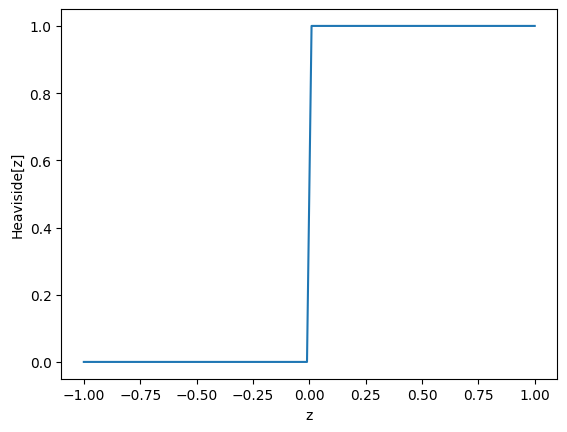

In [273]:
### SOLUTION
# Plot the Heaviside function
z = np.linspace(-1, 1, 100)
heaviside_z = heaviside(z)
plt.plot(z, heaviside_z)
plt.xlabel('z')
plt.ylabel('Heaviside[z]')

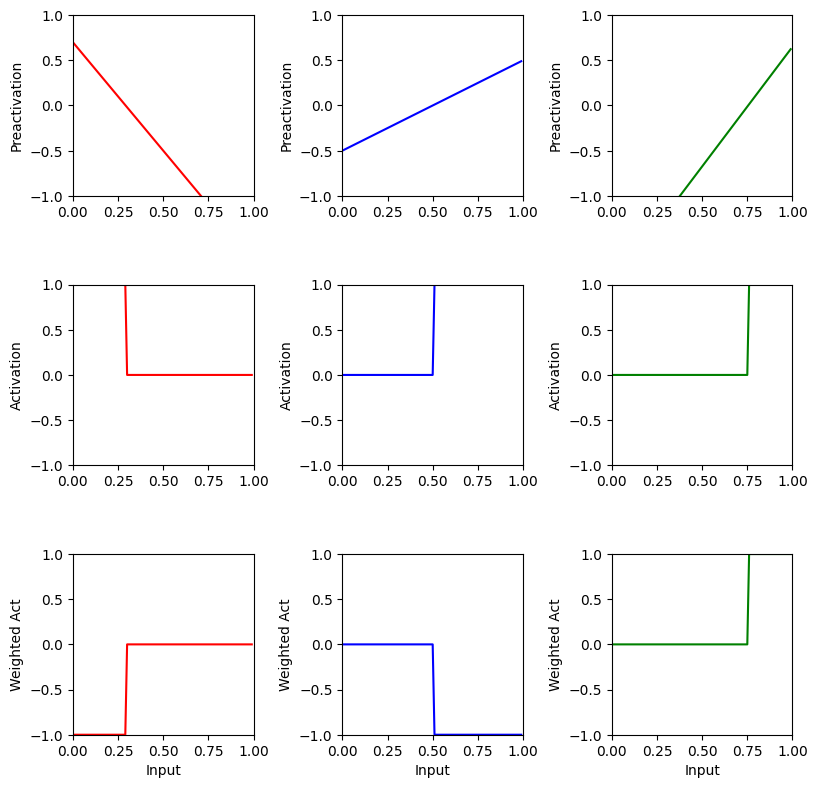

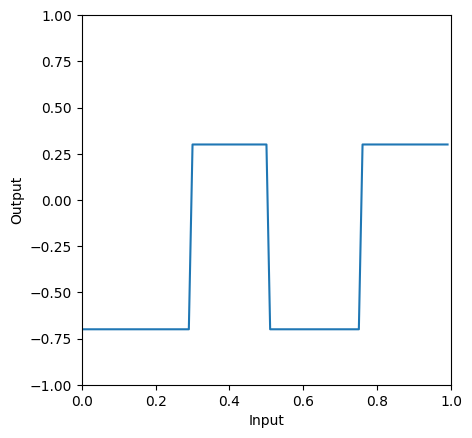

In [ ]:
# Let's use the network parameters from before
# Importantly, we have to use the Heaviside activation within the shallow_1_1_3() function now
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [275]:
### TASK
# TODO: Do this for one more activation function of your choice.
# According to ChatGPT the 'Top 3 hottest activation functions right now' are: SiLU, GELU and Mish. 
# You might find one of those interesting.

As we've seen, the choice of activation function fundamentally shapes the output of a neural network. The Sigmoid function yields smooth, continuous curves, whereas ReLU and Heaviside produce piecewise linear or piecewise constant outputs. This might raise the question: why use such seemingly limited functions? At first glance, this may appear restrictive. As we’ll discover when we get into model fitting, the answer isn’t so straightforward.

## 3.4 Taking Derivatives of Activation Functions (Pen&Paper)
Because we will later often need to work with derivatives, now is a good point to practice this again.

a) Show that the derivative of the Sigmoid function $\sigma(x)$ can be written as $\frac{d}{dx}\sigma(x) = \sigma(x)(1-\sigma(x))$

b) What is the derivative of the ReLU function?

c) The tanh function is defined as $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$. Find its derivative.

### SOLUTION

a) The Sigmoid function is defined as:
$
\sigma(x) = \frac{1}{1 + e^{-x}}.
$
Let’s compute the derivative:
$$
\frac{d}{dx} \sigma(x) = \frac{d}{dx} \left( \frac{1}{1 + e^{-x}} \right)
= \frac{e^{-x}}{(1 + e^{-x})^2}
= \left( \frac{1}{1 + e^{-x}} \right) \left( \frac{e^{-x}}{1 + e^{-x}} \right)
= \sigma(x)(1 - \sigma(x)).
$$

b) The ReLU function is defined as:
$
f(x) = \max(0, x).
$
Its derivative is:
$$
f'(x) =
\begin{cases}
1 & \text{if } x > 0, \\
0 & \text{if } x \leq 0.
\end{cases}
$$

c) The tanh function is:
$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}.
$
Using the quotient rule:
$$
f'(x) = \frac{(e^x + e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x})}{(e^x + e^{-x})^2}
= \frac{(e^x + e^{-x})^2 - (e^x - e^{-x})^2}{(e^x + e^{-x})^2}.
$$
Note:
$
(a + b)^2 - (a - b)^2 = 4ab \Rightarrow f'(x) = \frac{4e^x e^{-x}}{(e^x + e^{-x})^2} = \frac{4}{(e^x + e^{-x})^2}.
$
But since $f(x) = \tanh(x)$, we can write the derivative more compactly as:
$
\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x).
$